### This dataset contains all the data related to the drive booked by the customer

This data set has been taken from kaggle(Ref.)

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
drive = pd.read_csv('My Uber Drives - 2016.csv')

In [81]:
pd.options.display.max_rows = 500

In [82]:
drive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [83]:
drive.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [84]:
drive.shape

(1156, 7)

In [85]:
drive.tail(5)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


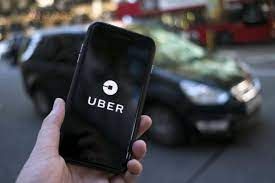

In [86]:
print(drive.nunique())

START_DATE*    1155
END_DATE*      1154
CATEGORY*         2
START*          177
STOP*           188
MILES*          257
PURPOSE*         10
dtype: int64


In [87]:
null_vals = drive.isna().sum().reset_index()
null_vals.columns = ['Headings', 'Missing_values']
null_vals

,Headings,Missing_values
0,START_DATE*,0
1,END_DATE*,1
2,CATEGORY*,1
3,START*,1
4,STOP*,1
5,MILES*,0
6,PURPOSE*,503


In [88]:
drive.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [89]:

drive.shape

(1156, 7)

In [90]:
drive.dropna(inplace= False)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


col_0,Count of travels as per category
CATEGORY*,
Business,1078
Personal,77


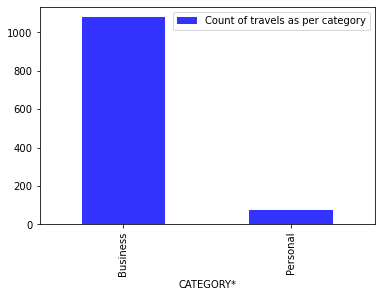

In [91]:
Category =pd.crosstab(index=drive['CATEGORY*'],columns='Count of travels as per category')

Category.plot(kind='bar',color='b',alpha=0.8)
plt.legend()
Category

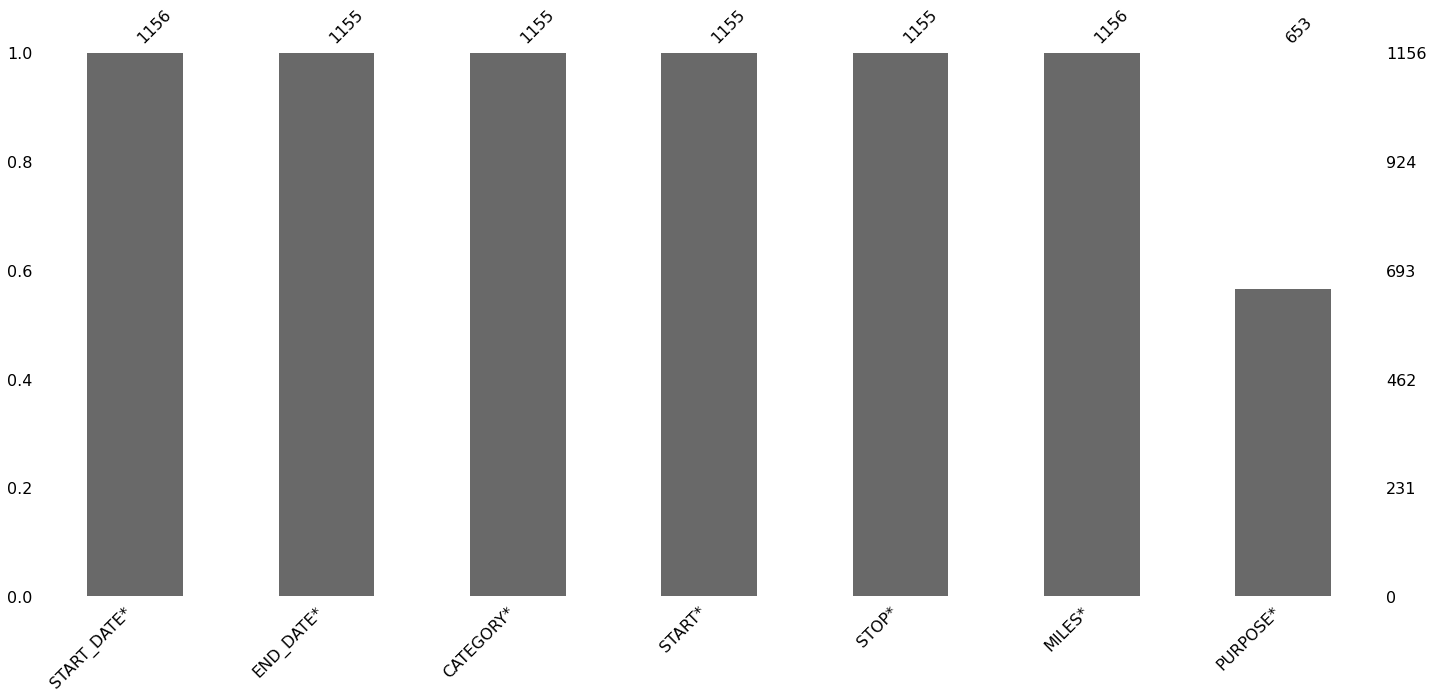

In [95]:
import missingno as ms
plt.figure(figsize=(10,10))
ms.bar(drive)
plt.show()

C:\Users\vihaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PURPOSE*', ylabel='count'>

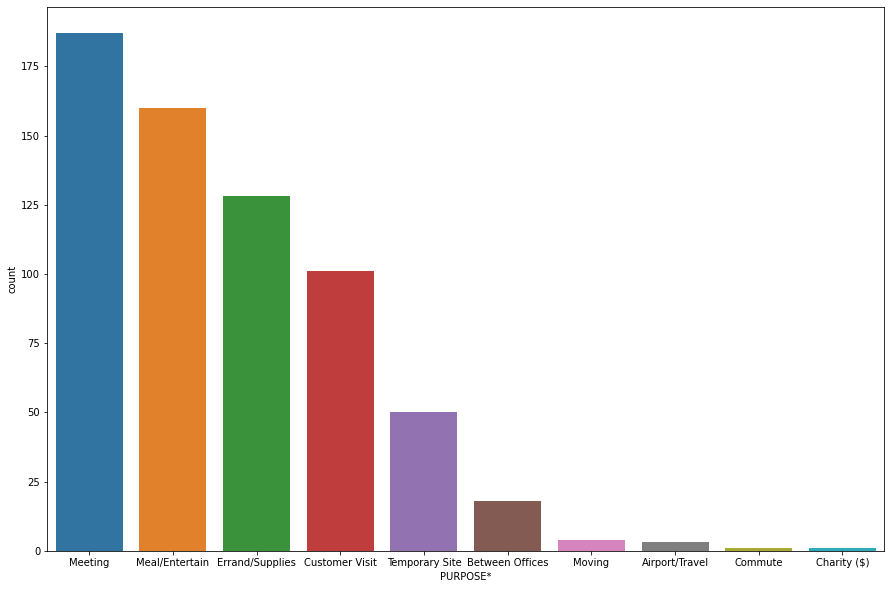

In [97]:
plt.figure(figsize=(15,10))
sns.countplot(drive['PURPOSE*'],order=drive['PURPOSE*'].value_counts().index)

#### From the above plot we get to know the reason for most drives booked

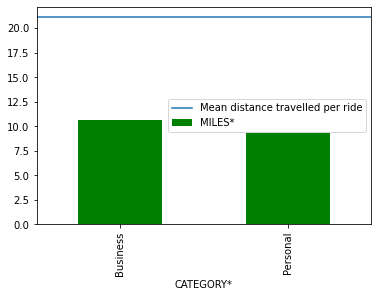

In [98]:
drive.groupby('CATEGORY*')["MILES*"].mean().plot(kind='bar',color='g')
plt.axhline(drive["MILES*"].mean(),label='Mean distance travelled per ride')
plt.legend()